In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5428 sha256=3dfca0b5f4e80f8cd950ce090e8c68544bde72b38f7e4b5418e8aec0026c1d4a
  Stored in directory: /root/.cache/pip/wheels/85/c7/3d/38784ece9ac882d3afdb852ea8cf867df942fe6c71da5c4360
Successfully built bubbly
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from bubbly.bubbly import bubbleplot 


In [3]:
data = pd.read_csv('/kaggle/input/pakistan-temperature/Tempreture_1901_2016_Pakistan.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1    Year                    1392 non-null   int64  
 2   Month                    1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


In [4]:
data.rename(columns={"Temperature - (Celsius)":"temp", 
                    " Year":"year",
                    "Month":"month"}, inplace=True)
data.head()

,temp,year,month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May


In [5]:
# Create Month Dictionary
# Add Dupplicate Column with Name int_month
# Replace new column characters month name with integer values of months
month_dict = {"January": 1, "February": 2, 
              "March": 3, "April": 4, 
              "May": 5, "June": 6, 
              "July": 7, "August": 8, 
              "September": 9, "October": 10, 
              "November": 11, "December": 12}

data["int_month"] = data["month"]      # Add New Column
data["int_month"] = data["int_month"].replace(month_dict)
print (data["int_month"].max() )
data

12


,temp,year,month,int_month
0,7.72768,1901,January,1
1,8.93600,1901,February,2
2,16.96320,1901,March,3
3,21.27410,1901,April,4
4,26.04970,1901,May,5
...,...,...,...,...
1387,27.63320,2016,August,8
1388,26.71790,2016,September,9
1389,22.39820,2016,October,10
1390,15.76720,2016,November,11


In [6]:
xyears = data["year"].unique()
gtotal = data["temp"].sum()
gmeans = data["temp"].mean()
print("Total Number of Years: ", len(xyears))
print("Grand Sum of Temperatures: ", gtotal)
print("Mean of Temperatures: ", gmeans)

Total Number of Years:  116
Grand Sum of Temperatures:  27849.92418
Mean of Temperatures:  20.007129439655166


# Calculate the Sum and Mean of the relavent years

In [7]:
tempData = pd.DataFrame(columns = {"years", "sum", "means"} )
rowNum = 0
for x in xyears:
    tempData.at[rowNum, 'years'] = x
    tempData.at[rowNum, 'sum'] = data[data["year"] == x]["temp"].sum()
    tempData.at[rowNum, 'means'] = data[data["year"] == x]["temp"].mean()
    rowNum += 1
tempData

,sum,years,means
0,240.73018,1901,20.060848
1,244.88203,1902,20.406836
2,233.57785,1903,19.464821
3,239.64451,1904,19.970376
4,233.37826,1905,19.448188
...,...,...,...
111,240.64243,2012,20.053536
112,247.8326,2013,20.652717
113,246.33441,2014,20.527868
114,246.70871,2015,20.559059


# Graphical Visualization of Data Temperature

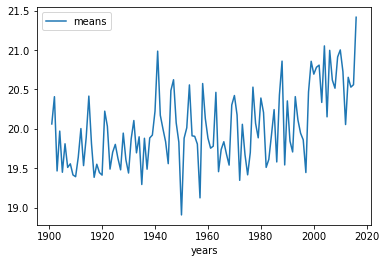

In [8]:
tempData["means"] = tempData["means"].astype(float)
tempData.plot("years", "means");

# 3D Representation of give Data

In [9]:
print("3D Representation of All Year Temperature")
fig = px.scatter_3d(data, x='year', y='month', z='temp', size='temp', color='month')
fig.show()

3D Representation of All Year Temperature


# Last 5-Years Data Visualization

In [10]:
# For Last Five Years
end_year = data.year.max()
start_year = end_year - 4
end_year = end_year+1
print(start_year, end_year)

2012 2017


In [11]:
data_last_5years = pd.DataFrame(columns = {"year", "month", "temp"} )
rowNum = 0
for x in range(start_year, end_year):
    getData = data[data["year"] == x]
    for y, yRows in getData.iterrows():
        data_last_5years.at[rowNum, 'year'] = x
        data_last_5years.at[rowNum, 'month'] = yRows["month"]
        data_last_5years.at[rowNum, 'temp'] = yRows["temp"]
        rowNum += 1
data_last_5years.head()

,temp,month,year
0,7.89622,January,2012
1,9.10051,February,2012
2,16.0177,March,2012
3,21.7783,April,2012
4,26.3565,May,2012


In [12]:
data_last_5years["temp"] = data_last_5years["temp"].astype("float")
print ("Total Number of Rows: ", len(data_last_5years))
data_last_5years.tail()

Total Number of Rows:  60


,temp,month,year
55,27.6332,August,2016
56,26.7179,September,2016
57,22.3982,October,2016
58,15.7672,November,2016
59,12.8763,December,2016


In [13]:
# Representation of Last Five Years (2012-2016)
fig = px.scatter_3d(data_last_5years, x='year',
                    y='month', z='temp', size='temp', color='month')
fig.show()

In [14]:
figure = bubbleplot(dataset=data.loc[(data.year >=2000)], 
                    x_column='int_month', y_column='temp', 
                    
                    bubble_column='month', 
                    time_column='year', size_column='temp', color_column='month', 
                    x_title="MONTHS", y_title="TEMPERATURE", title='LAST 5-YEAR TIMELINE FOR MONTH-TEMPERATURE RELATION',
                    y_logscale=False, x_logscale=False, scale_bubble=2, height=650)
iplot(figure)

In [15]:
figure = bubbleplot(dataset=data, 
                    x_column='year', y_column='temp',
                    
                    bubble_column='month', 
                    time_column='year', size_column='temp', color_column='month',
                    x_title="Years", y_title="Average Temperature", 
                    title='Timeline of Yearly per Month Temperature', 
    colorbar_title='Temperature', colorscale='temp', y_range=[6,35], x_range=[1901, 2016], 
    x_logscale=False, y_logscale=False, scale_bubble=1.5, height=650) 
iplot(figure)

**Like -> Upvote ---> Motivation**
# Appriciation with lots of love, looking for your guidance, Like, UPVOTES for Motivation. Previously Notebook comments and like/Upvores highly appriciated and motivated. Thanks with lots of LOVE :)